In [1]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn as nil
import seaborn as sb
from scipy import io as sio
from matplotlib import gridspec
from nilearn import plotting as nlp
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
mod_path = '/data1/guilimin/data/abide/pheno/sc7/model_full_maybe_sc7.csv'
fig_path = '/home/surchs/GDrive/PhD/Conferences/MIICIA2016/Figures/'

In [4]:
mod = pd.read_csv(mod_path)

In [5]:
# Make a new dataframe 
dx = mod.DX_GROUP.values
var = np.ones(mod.shape[0])
age = mod.AGE_AT_SCAN.values

df_age = pd.DataFrame(data={'Diagnosis':dx, 'variable':var, 'Age':age})
df_age.Diagnosis.replace({1:'Patient', 2:'Control'}, inplace=True)
df_age.variable.replace({1:'Age'}, inplace=True)

In [6]:
# Make a new dataframe 
dx = mod.DX_GROUP.values
var = np.ones(mod.shape[0])
mot = mod.FD_scrubbed.values

df_mot = pd.DataFrame(data={'Diagnosis':dx, 'variable':var, 'Motion':mot})
df_mot.Diagnosis.replace({1:'Patient', 2:'Control'}, inplace=True)
df_mot.variable.replace({1:'Motion'}, inplace=True)

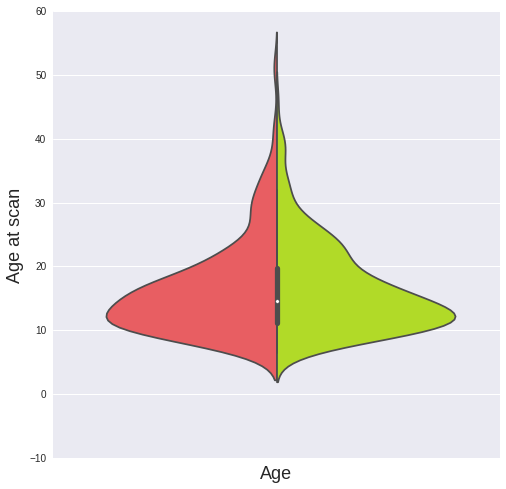

In [7]:
# Age
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
sb.violinplot(x='variable', y='Age', hue='Diagnosis', data=df_age, 
              palette=sb.xkcd_palette(["light red", "chartreuse"]), split=True, ax=ax)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_ylabel('Age at scan', fontsize=18)
ax.legend_.remove()
fig_name = 'age_psm.png'
f.savefig(os.path.join(fig_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)

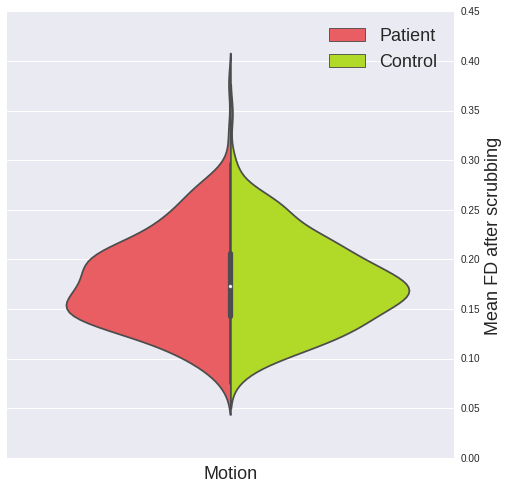

In [8]:
# Motion
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
sb.violinplot(x='variable', y='Motion', hue='Diagnosis', data=df_mot, 
              palette=sb.xkcd_palette(["light red", "chartreuse"]), split=True, ax=ax)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)

ax.set_ylabel('Mean FD after scrubbing', fontsize=18)
ax.legend(prop={'size':18})
fig_name = 'motion_psm.png'
f.savefig(os.path.join(fig_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)